In [13]:
import matplotlib.colors
import sklearn.datasets as dt
import matplotlib.pyplot as plt

import numpy as np

In [43]:
seed = 42
rand_state = 42

color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","cyan","magenta","blue"])

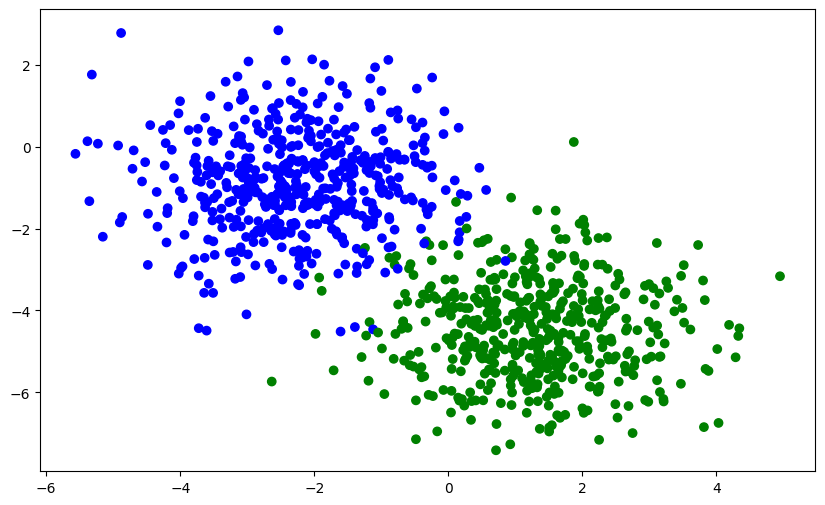

In [44]:
fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(10,6))

x, y = dt.make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.2, center_box=(5, -5), random_state=rand_state)

my_scatter_plot = plt.scatter(x[:,0],
                              x[:,1],
                              c=label,
                              vmin=min(y),
                              vmax=max(y),
                              cmap=color_map_discrete)
fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.show()